# Übungsblatt 1: Fehlerrechnung

 * [Aufgabe 1](#Aufgabe-1)
 * [Aufgabe 2](#Aufgabe-2)
 * [Aufgabe 3](#Aufgabe-3)

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')#

---
## Aufgabe 1
Gegeben sei eine parametrische Funktion $y = f(x)$, $y = 1 + a_1x + a_2x^2$ mit Parametern $a_1 = 2.0 ± 0.2$, $a_2 = 1.0 ± 0.1$ und Korrelationskoeffizient $ρ = −0.8$.

---

In [4]:
a1, a1_err = 2.0, 0.2
a2, a2_err = 1.0, 0.1
rho = -0.8

---
### 1.1
Geben Sie die Kovarianzmatrix von $a_1$ und $a_2$ an.

---

In [75]:
a1_var = a1_err**2
a2_var = a2_err**2
cov_a1_a2 =  rho*a1_err*a2_err
cov = np.matrix([[a1_var,cov_a1_a2],[cov_a1_a2,a2_var]])
cov

matrix([[ 0.04 , -0.016],
        [-0.016,  0.01 ]])

---
### 1.2
Bestimmen Sie analytisch die Unsicherheit von $y$ als Funktion von $x$:

---

---
#### 1.2.1
unter Vernachlässigung der Korrelation

---

In [10]:
def delta_f(x,delta_a1,delta_a2):
    return np.sqrt((x*delta_a1)**2+(x**2*delta_a2)**2)

---
#### 1.2.2
mit Berücksichtigung der Korrelation

---

In [60]:
def delta_f_cov(x,delta_a1,delta_a2,cov_a1_a2):
    return np.sqrt((x*delta_a1)**2+(x**2*delta_a2)**2+ 2*x**3*cov_a1_a2)

---
### 1.3
Bestimmen Sie per Monte Carlo die Unsicherheit von $y$ als Funktion von $x$:

#### 1.3.1
Generieren Sie Wertepaare $(a_1, a_2)$ gemäß ihrer Kovarianzmatrix und visualisieren Sie diese, z.B. mit einem Scatter-Plot.

_Hinweis_: Wenn $x_1$ und $x_2$ zwei gaussverteilte Zufallszahlen mit Mittelwert null und Varianz eins sind, erhält man ein Paar korrelierter gaussverteilter Zufallszahlen $(y_1, y_2)$ mit Mittelwert null und Varianz eins durch $(y_1 = x_1; y_2 = x_1ρ + x_2\sqrt{1 − \rho^2})$.

---

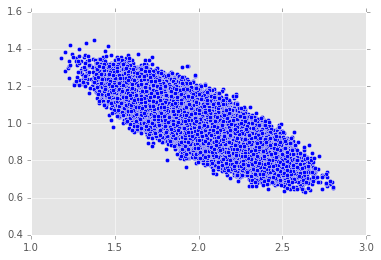

In [53]:
x1,y1 = np.random.multivariate_normal(np.array([a1,a2]), cov,size=100000).T
plt.scatter(x1,y1)
plt.show()

---
#### 1.3.2
Bestimmen Sie die Verteilung von $y$ für $x = \{−1, 0, +1\}$ und vergleichen Sie Mittelwert und Varianz (Standardabweichung) mit den Resultaten der analytischen Rechnung.

---

MC sigma: 0.285360451491 Theorie  0.286356421266
MC Mean: 0.000244938871759 Theorie  0.0


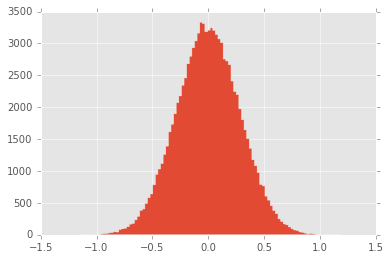

MC sigma: 0.0 Theorie  0.0
MC Mean: 1.0 Theorie  1.0


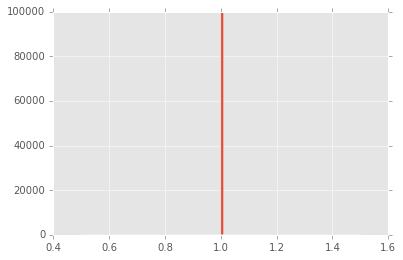

MC sigma: 0.133922558984 Theorie  0.13416407865
MC Mean: 3.99976017296 Theorie  4.0


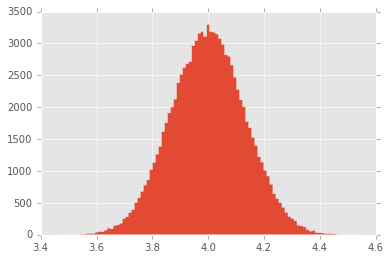

In [73]:
def y(x,a,b):
    return a*x+b*x**2+1
for x in [-1,0,1]:
    y_ = y(x,x1,y1)
    print("MC sigma:", y_.std(), "Theorie ", delta_f_cov(x, a1_err, a2_err, cov[0,1]))
    print("MC Mean:", y_.mean(), "Theorie ",y(x,a1,a2))
    plt.hist(y_,100,histtype="stepfilled")
    plt.show()

---
## Aufgabe 2
Betrachten Sie folgende Reparametrisierung von $y = f(x)$:
    
$$y = 1 + \frac{x(1+x)}{b_1} + \frac{x(1-x)}{b_2}$$

### 2.1
Bestimmen Sie analytisch die transformierten Parameter $b_1$ und $b_2$ und deren Kovarianzmatrix

---

In [94]:
B = np.matrix([[-2/9,-2/9],[-2,2]])
b1 = 2/3
b2 = 2
cov_b = B*cov*B.T

cov_b

matrix([[ 0.00088889,  0.01333333],
        [ 0.01333333,  0.328     ]])

---
### 2.2
Bestimmen Sie die Kovarianzmatrix der transformierten Parameter per Monte Carlo

---

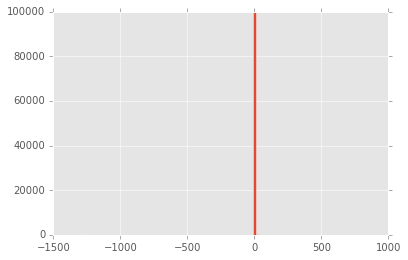

In [99]:
b1_mc = 2/(x1+y1)
b2_mc = 2/(x1-y1)

plt.hist(b2_mc,100)
plt.show()

---
### 2.3
Bestimmen Sie analytisch die Unsicherheit von $y$ als Funktion von $x$:

---

---
#### 2.3.1
unter Verwendung der analytisch bestimmten Kovarianzmatrix von $(b_1, b_2)$

---

---
#### 2.3.2
unter Verwendung der numerisch bestimmten Kovarianzmatrix von $(b_1, b_2)$

---

---
## Aufgabe 3
Lösen Sie die obigen Teilaufgaben für $y = f(x)$ mit

$$y = \ln\left(1 + a_1x + a_2x^2\right) \quad \text{bzw.} \quad y = \ln\left(1 + \frac{x(1+x)}{b_1} + \frac{x(x-1)}{b_2}\right)$$
